In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')

In [10]:
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-10-25 07:10:49.585498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 07:11:01.457555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38448 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20


2022-10-25 07:12:59.939331: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30/30 [==============================] - 14s 43ms/step - loss: 0.5182 - accuracy: 0.7828 - val_loss: 0.3884 - val_accuracy: 0.8600
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3023 - accuracy: 0.9021 - val_loss: 0.3293 - val_accuracy: 0.8668
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2197 - accuracy: 0.9279 - val_loss: 0.2747 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1707 - accuracy: 0.9443 - val_loss: 0.2723 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1389 - accuracy: 0.9569 - val_loss: 0.3057 - val_accuracy: 0.8781
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1137 - accuracy: 0.9655 - val_loss: 0.2945 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0940 - accuracy: 0.9719 - val_loss: 0.3138 - val_accuracy: 0.8840
Epoch 8/20
30/30 [=====

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
import matplotlib.pyplot as plt

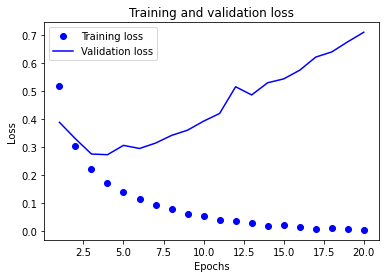

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

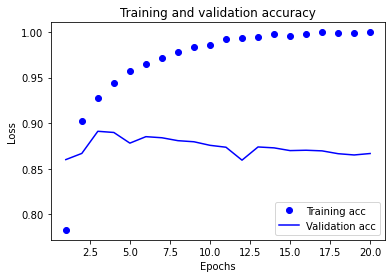

In [19]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4563 - accuracy: 0.8192
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2003 - accuracy: 0.9288
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1678 - accuracy: 0.9419


In [23]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8828


In [21]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.24767905],
       [0.99741226],
       [0.9615429 ],
       ...,
       [0.14645042],
       [0.0834434 ],
       [0.60720694]], dtype=float32)

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [29]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5568 - accuracy: 0.7668 - val_loss: 0.4292 - val_accuracy: 0.8567
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3301 - accuracy: 0.8984 - val_loss: 0.3203 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2331 - accuracy: 0.9261 - val_loss: 0.2884 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1836 - accuracy: 0.9407 - val_loss: 0.2743 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1436 - accuracy: 0.9562 - val_loss: 0.2974 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1210 - accuracy: 0.9621 - val_loss: 0.2916 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0944 - accuracy: 0.9734 - val_loss: 0.3125 - val_accuracy: 0.8854
Epoch 8/20
30

In [30]:
def graph_acc(history):
    acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

def graph_loss(history):
    loss_values = history['loss']
    val_loss_values = history['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

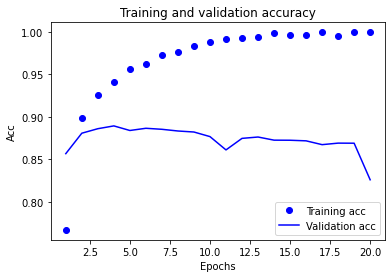

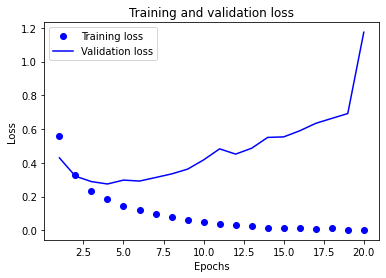

In [31]:
graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4948 - accuracy: 0.7973 - val_loss: 0.3885 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3145 - accuracy: 0.9036 - val_loss: 0.3168 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.9237 - val_loss: 0.2936 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2006 - accuracy: 0.9389 - val_loss: 0.2764 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1700 - accuracy: 0.9489 - val_loss: 0.2730 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1457 - accuracy: 0.9569 - val_loss: 0.2791 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1285 - accuracy: 0.9625 - val_loss: 0.2827 - val_accuracy: 0.8878
Epoch 8/20
30

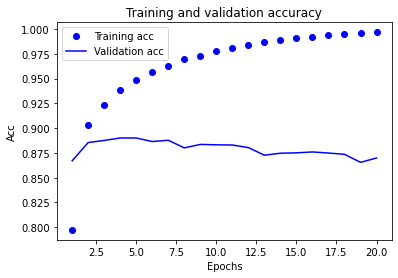

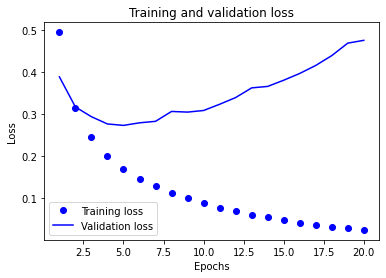

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6027 - accuracy: 0.7540 - val_loss: 0.5412 - val_accuracy: 0.8296
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4474 - accuracy: 0.8867 - val_loss: 0.4246 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3505 - accuracy: 0.9115 - val_loss: 0.3569 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2849 - accuracy: 0.9245 - val_loss: 0.3206 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2390 - accuracy: 0.9343 - val_loss: 0.3082 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2054 - accuracy: 0.9429 - val_loss: 0.2832 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1787 - accuracy: 0.9508 - val_loss: 0.2804 - val_accuracy: 0.8885
Epoch 8/20
30

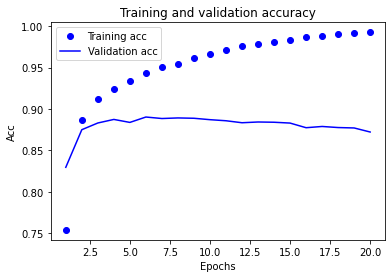

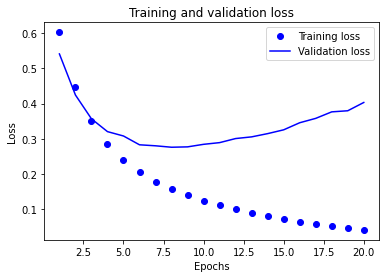

In [34]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4846 - accuracy: 0.7879 - val_loss: 0.3878 - val_accuracy: 0.8401
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2760 - accuracy: 0.9028 - val_loss: 0.2938 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2016 - accuracy: 0.9295 - val_loss: 0.2787 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1563 - accuracy: 0.9480 - val_loss: 0.2973 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1192 - accuracy: 0.9609 - val_loss: 0.3256 - val_accuracy: 0.8782
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1001 - accuracy: 0.9668 - val_loss: 0.3169 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.3409 - val_accuracy: 0.8840
Epoch 8/20
30

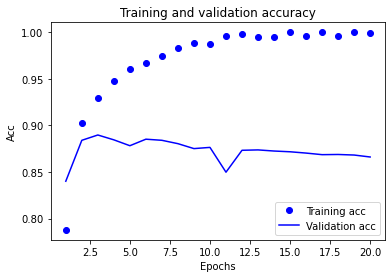

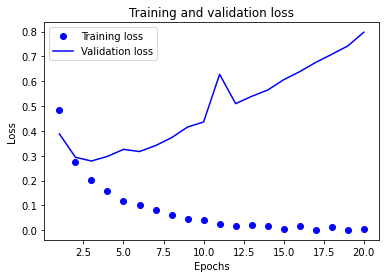

In [35]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1757 - accuracy: 0.7820 - val_loss: 0.1242 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0962 - accuracy: 0.9045 - val_loss: 0.0958 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0696 - accuracy: 0.9267 - val_loss: 0.0901 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0527 - accuracy: 0.9459 - val_loss: 0.0827 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0438 - accuracy: 0.9533 - val_loss: 0.0850 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.9662 - val_loss: 0.0824 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0287 - accuracy: 0.9737 - val_loss: 0.0853 - val_accuracy: 0.8840
Epoch 8/20
30

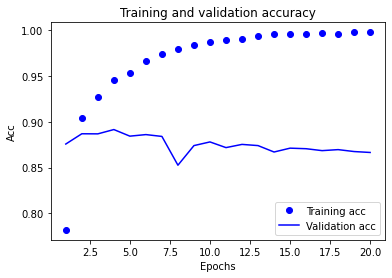

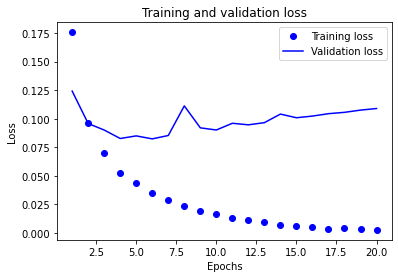

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.4806 - accuracy: 0.8001 - val_loss: 0.3927 - val_accuracy: 0.8350
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2767 - accuracy: 0.9072 - val_loss: 0.2861 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1937 - accuracy: 0.9349 - val_loss: 0.2929 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1476 - accuracy: 0.9501 - val_loss: 0.2777 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1134 - accuracy: 0.9627 - val_loss: 0.3702 - val_accuracy: 0.8620
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0899 - accuracy: 0.9703 - val_loss: 0.3910 - val_accuracy: 0.8660
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.3717 - val_accuracy: 0.8770
Epoch 8/20
30

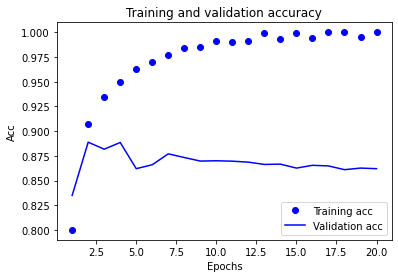

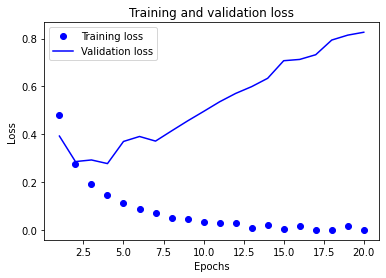

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)